In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Анализ данных об авариях в США за 2022 год с целью их уменьшения.

Целью данного проекта является анализ данных об авариях, произошедших в США в 2022 году, с целью выявления инсайтов и закономерностей, которые могут помочь в принятии мер по снижению количества аварий. Путем проведения исследовательского анализа мы стремимся выяснить, как погодные условия, время суток, серьезность ущерба, а также географические факторы влияют на количество происшедших аварий.

Предполагаем, что анализ данных позволит выявить основные факторы, которые влияют на количество аварий в США. Эти результаты могут стать основой для разработки мер по снижению аварийности на дорогах, включая улучшение дорожной инфраструктуры, введение ограничений в определенных условиях, улучшение погодных прогнозов и других мер безопасности.

План работы:

Шаг 1. Загрузка данных

Шаг 2. Предобработка данных

2.1 Проверить пропуски и дубликаты

2.2 Привести названия столбцов к змеиному типу

2.3 Выделить столбик с месяцем аварии

Шаг 3. Исследовательский анализ


3.1 Анализ степени серьезности аварий (severity):

    3.1.1 Определить наиболее часто встречающуюся степень серьезности аварий.

    3.1.2 Проанализировать зависимость между степенью серьезности и погодными условиями, временем суток и другими факторами.

    3.1.3 Влияние погодных условий на аварии:

3.2 Определить, какие погодные условия (дождь, снег, туман, температура, видимость, скорость ветра) чаще всего сопровождают аварии.

    3.2.2 Исследовать связь между погодными условиями и степенью серьезности аварий.

    3.3.3

3.3 Географические особенности:

    3.2.1 Изучить распределение аварий по городам, штатам и странам.

    3.3.2 Определить наиболее аварийные местности и выявить причины их повышенной аварийности.

    3.3.3 Влияние времени суток на аварии:

3.4 Проанализировать количество аварий в зависимости от времени суток (день/ночь).

    3.4.1 Определить, возможно ли сезонное влияние на частоту происшедших аварий.

    3.4.2 Влияние дополнительных факторов на аварии:

3.5 Оценить, как наличие различных объектов и удобств в близлежащих местах (например, перекрестков, светофоров, станций) влияет на количество аварий.

3.6 Проанализировать, как световые условия влияют на количесвто аварий:

3.6.1 Проанализировать различия в количестве аварий в зависимости от периода дня (день/ночь) и световых условий (гражданские, морские, астрономические сумерки).

## Предобработка данных.

In [10]:
# укажем путь к датасету
csv_file_path = "D:\\учеба\\Методич\\US_Accidents_March23.csv"

In [11]:
# Чтение данных порциями с использованием параметра chunksize
chunk_size = 100000  # Указать подходящий размер порции
chunks = pd.read_csv(csv_file_path, chunksize=chunk_size)

# подсчет общего числа строк в файле
total_rows = 0

# Обработка данных в цикле
for chunk in chunks:
    total_rows += len(chunk)

# Вывод общего числа строк в файле
print("Общее число строк в файле:", total_rows)


Общее число строк в файле: 7728394


In [13]:
# Посмотрим общую информацию о данных в каждой порции
for chunk in chunks:
    print(chunk.info())

In [14]:
# Чтение данных порциями с использованием параметра chunksize
chunk_size = 100000
chunks = pd.read_csv(csv_file_path, chunksize=chunk_size)

# Выберем первую порцию данных и выведем ее содержимое
first_chunk = next(chunks)
print(first_chunk)

             ID   Source  Severity           Start_Time             End_Time  \
0           A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1           A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2           A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3           A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4           A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
...         ...      ...       ...                  ...                  ...   
99995  A-100002  Source2         3  2016-04-05 15:52:14  2016-04-05 16:52:14   
99996  A-100003  Source2         3  2016-04-05 15:57:10  2016-04-05 16:57:10   
99997  A-100004  Source2         2  2016-04-05 16:02:16  2016-04-05 17:02:16   
99998  A-100005  Source3         2  2016-04-05 16:01:17  2016-04-05 17:01:17   
99999  A-100006  Source2         2  2016-04-05 16:06:41  2016-04-05 17:06:41   

       Start_Lat   Start_Lng  End_Lat  

In [15]:
# Создаём пустой список, чтобы хранить отфильтрованные части данных
filtered_chunks = []

# Проходёмся по каждой части данных, применим операции с датами и фильтрацию
for chunk in chunks:
    # Преобразуем столбец 'Start_Time' в тип datetime
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'])
    # Создаём условие фильтрации для получения строк за 2022 год
    condition = (chunk['Start_Time'].dt.year == 2022)
    # Применим условие фильтрации к текущей части данных
    filtered_chunk = chunk[condition]
    # Если есть хотя бы одна строка удовлетворяющая условию, добавим отфильтрованную часть данных в список
    if not filtered_chunk.empty:
        filtered_chunks.append(filtered_chunk)

# Проверим, что хотя бы одна часть данных удовлетворяет условию фильтрации
if len(filtered_chunks) > 0:
    # Объединим отфильтрованные части данных в один DataFrame
    df_2022 = pd.concat(filtered_chunks)
    # Выведем информацию о DataFrame
    print(df_2022.info())
else:
    print("Нет данных за 2022 год.")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762452 entries, 512217 to 5423496
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code     

In [16]:
# Создаём новый DataFrame, копируя данные из отфильтрованного DataFrame
new_df = df_2022.copy()

In [17]:
# приведём названия столбцов к единому типу
new_df.columns = [x.lower().replace(' ', '_') for x in new_df.columns]
display(new_df.head())

,id,source,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),...,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
512217,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Day,Day
512218,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Night,Night
512219,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Night,Night
512220,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Day,Day
512221,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.91,...,False,False,False,False,False,False,Night,Day,Day,Day


In [18]:
# посмотрим пропуски
new_df.isna().sum()

id                            0
source                        0
severity                      0
start_time                    0
end_time                      0
start_lat                     0
start_lng                     0
end_lat                  236182
end_lng                  236182
distance(mi)                  0
description                   0
street                     7236
city                         65
county                        0
state                         0
zipcode                     307
country                       0
timezone                   1713
airport_code               7199
weather_timestamp         29595
temperature(f)            38718
wind_chill(f)             54508
humidity(%)               41107
pressure(in)              33134
visibility(mi)            41953
wind_direction            48385
wind_speed(mph)           48377
precipitation(in)         64475
weather_condition         38688
amenity                       0
bump                          0
crossing

id - идентификатор аварии

source - источник, сообщивший об аварии

severity - степень серьёзности (от 1 до 4)

start_time - время начала аварии

end_time - время конца аварии

start_lat - начальная широта

start_lng  - начальная долгота

end_lat  - конечная широта

end_lng  - конечная долгота

distance(mi) - Протяженность дороги, затронутой аварией, в милях

description - описание аварии

street - улица

city - город

county - страна

state - штат

zipcode - индекс

country  - страна

timezone - часовой пояс

airport_code - код аэропорта

weather_timestamp - время наблюдения за погодой

Temperature(F) -  температура воздуха (в Фаренгейтах).

Wind_Chill(F) - холод ветра (по Фаренгейту).

Humidity(%) -  влажность (в процентах).

Pressure(in) - давление воздуха (в дюймах).

Visibility(mi) -  видимость (в милях).

Wind_Direction -  направление ветра.

Wind_Speed(mph) - скорость ветра (в милях в час).

Precipitation(in) - количество осадков в дюймах, если они есть.

Weather_Condition - погодные условия (дождь, снег, гроза, туман и т.д.).

amenity - наличие удобств в близлежащем месте

bump - наличие лежачего полицейского

crossing - наличие перекрестка в близлежащем месте.

give_way - наличие знака Уступи дорогу

junction - наличие перекрестка в соседнем месте.

no_exit

railway - наличие поблизости железной дороги.

roundabout - наличие кольцевой развязки поблизости.

station - наличие станции поблизости

stop - наличие остановки поблизости.

traffic_calming

traffic_signal - сигнал светофора

turning_loop

sunrise_sunset - период дня (т.е. день или ночь) в зависимости от восхода/захода солнца.

civil_twilight - период дня (т.е. день или ночь) на основе гражданских сумерек.

nautical_twilight - период дня (т.е. день или ночь) на основе морских сумерек.

astronomical_twilight - период дня (т.е. день или ночь) на основе астрономических сумерек.

In [30]:
#удалим из датасета столбцы, которые нам точно не нужны
#new_df = new_df.drop(['source', 'zipcode', 'no_exit', 'traffic_calming', 'turning_loop'], axis=1)

In [26]:
#посчитаем количество аварий за 2022 год
new_df['id'].count()

1762452

In [27]:
print("Количество аварий ночью:", new_df.query('sunrise_sunset == "Night"')['id'].count())

Количество аварий ночью: 492367


In [29]:
print("количество аварий днём", new_df.query('sunrise_sunset == "Day"')['id'].count())

количество аварий днём 1255189


Днём количество аварий больше в 2,5 раза, это связано с интенсивностью движения.

<AxesSubplot:xlabel='state'>

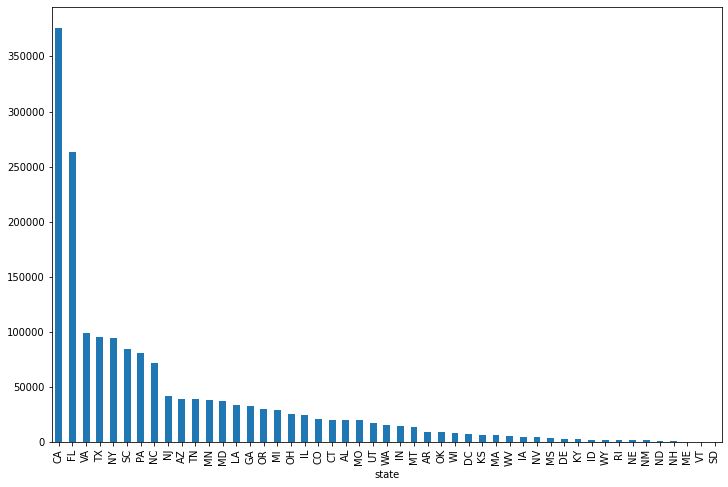

In [ ]:
#количество аварий по штатам
new_df.groupby('state')['id'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))

Общая численность в каждом штате:
    
    соотнести кол-во жителей и количество аварий. (Какой процент в каждои штате?)

Больше всего аварий 2 степени серьёзности - около 1,6 млн

<AxesSubplot:xlabel='city'>

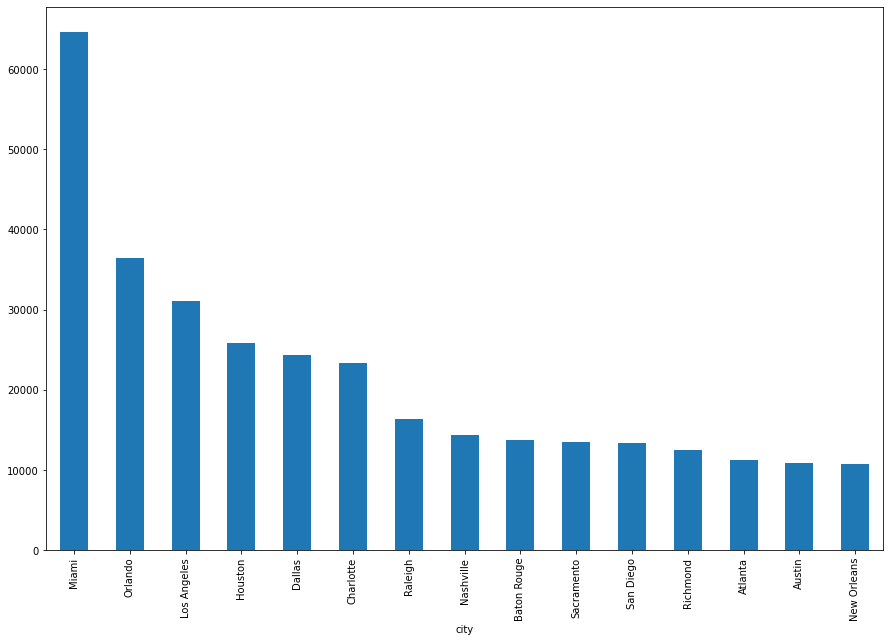

In [ ]:
# посмотрим, в каких городах больше всего аварий
new_df.groupby('city')['id'].count().sort_values(ascending=False).head(15).plot(kind='bar', figsize = (15,10))

In [ ]:
new_df.groupby('city')['id'].count().sort_values(ascending=False).head(15)

city
Miami          64544
Orlando        36413
Los Angeles    31072
Houston        25865
Dallas         24306
Charlotte      23308
Raleigh        16410
Nashville      14368
Baton Rouge    13683
Sacramento     13543
San Diego      13324
Richmond       12514
Atlanta        11234
Austin         10906
New Orleans    10704
Name: id, dtype: int64

В городах Майами и Орландо было больше всего аварий (64544 и 36413) при плотности населения: Майами - 435 919 чел., Орландо -287 442 чел. При этом в городах миллионниках аварий было меньше, чем Майами и Орландо, например:

1. Лос-Анджелись - население 3 898 747
2. Хьюстон 2 320 268
3. Dallas 

In [ ]:
# Оценим количество аварий в развивке по серьёзности ущерба
new_df.groupby('severity')['id'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))

In [ ]:
# Удалить столбцы 'Column1' и 'Column2' из DataFrame df, чтоб создать датафрейм с погодой
weather = new_df.drop(['source', 'start_Time', 'end_time', 'Start_Lat', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Zipcode', 'Timezone', 'Airport_Code', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [ ]:
weather

Temperature(F) - Показывает температуру (в Фаренгейтах).

Wind_Chill(F) - Показывает холод ветра (по Фаренгейту).

Humidity(%) - Показывает влажность (в процентах).

Pressure(in) - Показывает давление воздуха (в дюймах).

Visibility(mi) - Показывает видимость (в милях).

Wind_Direction - Показывает направление ветра.

Wind_Speed(mph) - Показывает скорость ветра (в милях в час).

Precipitation(in) - Показывает количество осадков в дюймах, если они есть.

Weather_Condition - Показывает погодные условия (дождь, снег, гроза, туман и т.д.).

In [ ]:
weather.corr()

In [ ]:
# Предположим, что у вас уже есть DataFrame weather с данными о погоде
# Если вы хотите построить тепловую карту для всех числовых столбцов, можно сделать так:
correlation_matrix = weather.corr()

# Используем библиотеку Seaborn для построения тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()


In [ ]:
twilight = new_df.drop(['Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition','Zipcode', 'Timezone', 'Airport_Code', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'], axis=1)

In [ ]:
twilight.corr()

In [ ]:
correlation_2 = twilight.corr()
# Используем библиотеку Seaborn для построения тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()